In [8]:
import numpy as np
from utils import WindSpeedVisualizer, GcpERA5
import pandas as pd

In [9]:
gcp = GcpERA5('gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2')
date_range = pd.date_range("2020-01-01", periods=24, freq="h")
variables = ["10m_u_component_of_wind","10m_v_component_of_wind" ]
gcp.get_data(date_range=date_range, variables=variables)
gcp.download()
wind_speed_gcp, _ = gcp.calculate_wind_speed()

2024-06-13 13:54:41.997 | INFO     | utils:__init__:176 - ERA5 reanalysis data loaded successfully from gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2
2024-06-13 13:54:42.013 | INFO     | utils:get_data:195 - Data slice selected for date range
2024-06-13 13:54:45.027 | INFO     | utils:calculate_wind_speed:219 - Wind speed calculated successfully from regridded dataset


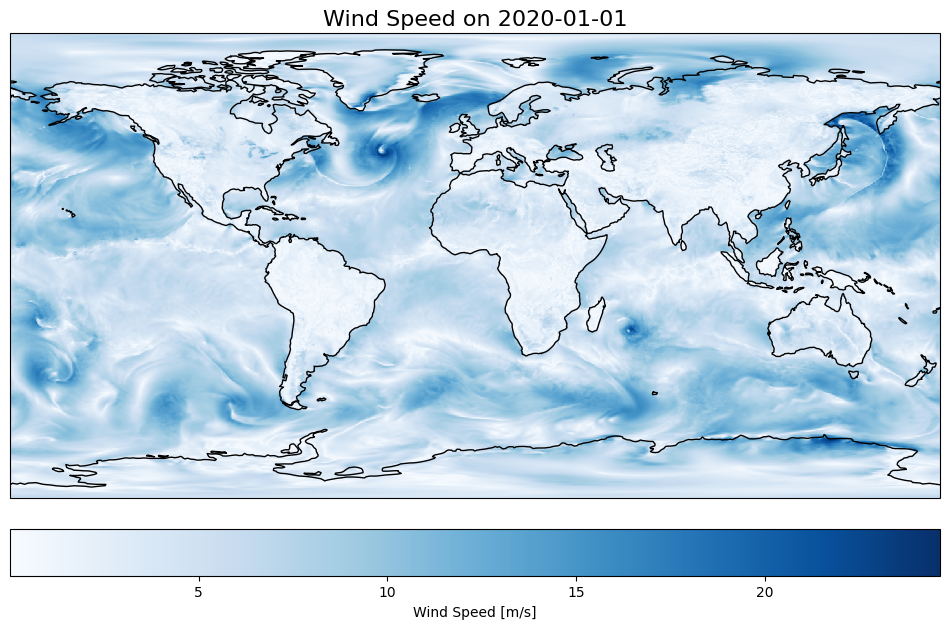

In [10]:
WindSpeedVisualizer.plot_wind_speed(wind_speed_gcp.sel(time=wind_speed_gcp.time[0]))

In [11]:
wind_anim = WindSpeedVisualizer.generate_animation(wind_speed_gcp)

In [12]:
wind_anim